## Data Cleaning intro - 2019-10-16 - Balazs Balogh

#### Data preprocessing has a huge impact on machine learning. Like the saying "you are what you eat," the model's performance is a direct reflection of the data it's trained on.

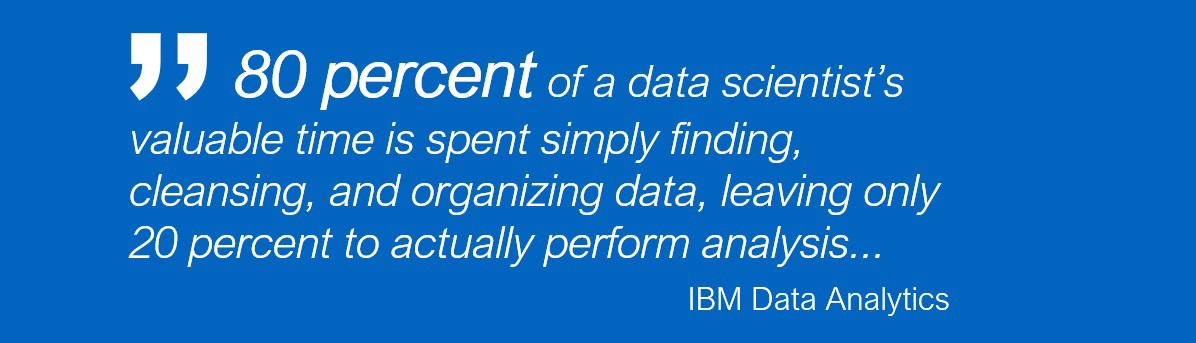

### Gapminder dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gapminder = pd.read_csv("https://raw.githubusercontent.com/budapestpy-workshops/sample_files/master/gapminder.csv")

gapminder.head()

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [3]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 219 entries, Unnamed: 0 to Life expectancy
dtypes: float64(217), int64(1), object(1)
memory usage: 1.3+ MB


(20, 55)

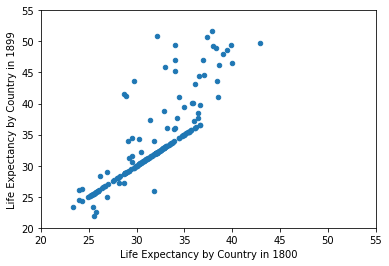

In [4]:
"""
Here, the goal is to visually check the data for insights as well as errors. 
When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, 
and which points fall below or above the diagonal line. This will inform how life expectancy in 1899 
changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line, 
it means that life expectancy remained the same.
"""

# Create the scatter plot
gapminder.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

In [5]:
"""
- Delete the columns we don't need.
- Country could be only object (string).
- Year and Life expectancy is numerical, and above 0.
"""
gapminder.drop('Unnamed: 0', axis=1, inplace=True)

gapminder.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [6]:
"""
Currently, the gapminder DataFrame has a separate column for each year. What you want instead is a 
single column that contains the year, and a single column that represents the average life expectancy 
for each year and country.

Doing this with Pandas' melt function: "Unpivot a DataFrame from wide format to long format, 
optionally leaving identifier variables set."

Then we rename the columns, which are by default "variable" and "value".
"""

gapminder_melt = pd.melt(gapminder, id_vars='Life expectancy')
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

gapminder_melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [7]:
"""
We can see, that the year column is object datatype. It needs to converted to numeric.
The other thing, is the DataFrame uses 3.9 Mbytes of memory, which can be reduced.
"""

gapminder_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null object
life_expectancy    43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.9+ MB


In [8]:
"""
Index doesn't use much memory, but country and year does.
What we know about these columns?
- There are finite number of countries, so this could be Pandas' category datatype, which is made for this kind of columns.
- Year is from 1800-2016, which can be fitted into int16 (-32768 - 32767). 
- Life expectancy: we don't need big precision, we could try float32 instead of the default float64.
"""

orig_memory_usage = gapminder_melt.memory_usage(deep=True)
orig_memory_usage

Index                   128
country            11311125
year               10324860
life_expectancy     1354080
dtype: int64

In [9]:
"""
Let's change the datatypes.
"""
gapminder_melt['year'] = gapminder_melt['year'].astype(np.int16)
gapminder_melt['country'] = gapminder_melt['country'].astype('category')
gapminder_melt['life_expectancy'] = gapminder_melt['life_expectancy'].astype(np.float32)

new_memory_usage = gapminder_melt.memory_usage(deep=True)
new_memory_usage

Index                 128
country            366158
year               338520
life_expectancy    677040
dtype: int64

In [10]:
"""
Now the DataFrame uses 1.3 Mbytes, the third of the original size.
"""

gapminder_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null category
year               169260 non-null int16
life_expectancy    43857 non-null float32
dtypes: category(1), float32(1), int16(1)
memory usage: 1.3 MB


In [11]:
"""
After converting the life_expectancy to float32, it doesn't look perfect with the long precision numbers.
"""

gapminder_melt.head(10)

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.209999
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.400002
4,Algeria,1800,28.820000
5,American Samoa,1800,NaN
6,Andorra,1800,NaN
7,Angola,1800,26.980000
8,Anguilla,1800,NaN
9,Antigua and Barbuda,1800,33.540001


In [12]:
"""
The set_option parameter just what we need.
"""

pd.set_option('precision', 2)
gapminder_melt['life_expectancy'].head()

0      NaN
1    28.21
2      NaN
3    35.40
4    28.82
Name: life_expectancy, dtype: float32

In [13]:
"""
Now check the spelling of the countries.
The regex pattern is all the letters from a-z, uppercase and lowercase. "." and whitespaces are okay.

Countries seems valid.
"""

countries = gapminder_melt['country']
countries = countries.drop_duplicates()

pattern = '^[A-Za-z\.\s]*$'

mask = countries.str.contains(pattern)
mask_inverse = ~mask

invalid_countries = countries.loc[mask_inverse]
invalid_countries

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: category
Categories (260, object): [Abkhazia, Afghanistan, Akrotiri and Dhekelia, Albania, ..., Yugoslavia, Zambia, Zimbabwe, Åland]

In [14]:
gapminder_melt.shape

(169260, 3)

In [15]:
"""
Make sure that there's no NaN values in the country and year columns. We know, that we have a lot of NaNs 
in the life_expectancy, we get rid of them now.
That's why the melt was practical, because we drop not an entire country, or year, but just one record.
"""

assert pd.notnull(gapminder_melt.country).all()
assert pd.notnull(gapminder_melt.year).all()

gapminder_melt.dropna(inplace=True)
gapminder_melt.shape

(43857, 3)

year
1800    31.49
1801    31.45
1802    31.46
1803    31.38
1804    31.45
Name: life_expectancy, dtype: float32
year
2012    71.66
2013    71.92
2014    72.09
2015    72.32
2016    72.56
Name: life_expectancy, dtype: float32


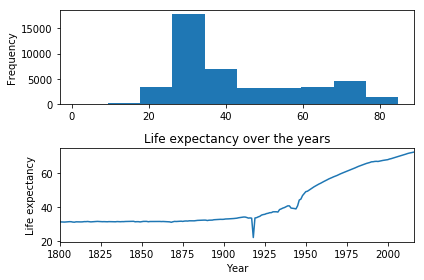

In [16]:
"""
It's time to wrap up, and visualise what we've done.

We have the data, without NaN values, and the numeric columns are between reasonable values.
"""

plt.subplot(2, 1, 1) 
gapminder_melt['life_expectancy'].plot(kind='hist')

gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()
print(gapminder_agg.head())
print(gapminder_agg.tail())

plt.subplot(2, 1, 2)
gapminder_agg.plot()

plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

gapminder.to_csv('gapminder.csv', header=True)
gapminder_agg.to_csv('gapminder_agg.csv', header=True)


### Tips dataset

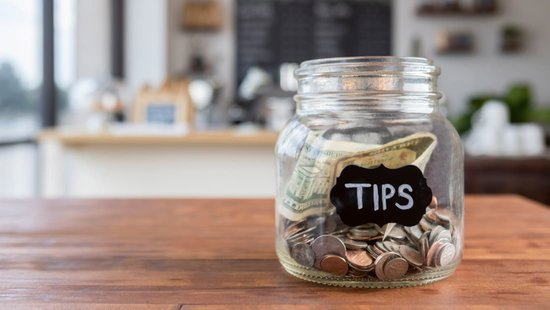

In [17]:
import pandas as pd

tips = pd.read_csv("https://raw.githubusercontent.com/budapestpy-workshops/sample_files/master/tips.csv")

tips.head()

,Unnamed: 0,bill,tip,sex,smoker,day,time,size,total_bill
0,0,16.99,1.01,Female,No,Sun,Dinner,2,$18.0
1,1,10.34,1.66,Male,No,Sun,Dinner,3,$12.0
2,2,NaN,NaN,Male,No,Sun,Dinner,3,NaN
3,3,23.68,3.31,Male,No,Sun,Dinner,2,$26.99
4,4,24.59,3.61,Female,No,Sun,Dinner,4,$28.2


In [18]:
"""
What's wrong here?


- total_bill and tip is object type, becasuse there are some "missing" data.
- Unnamed: 0 needs to be deleted.
"""

tips.drop('Unnamed: 0', axis=1, inplace=True)

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
bill          238 non-null float64
tip           237 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
total_bill    233 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 15.4+ KB


In [19]:
"""
Convert them to numeric type. coerce: "invalid parsing will be set as NaN".
"""

tips['bill'] = pd.to_numeric(tips['bill'], errors='coerce')
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce')

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
bill          238 non-null float64
tip           237 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
total_bill    233 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 15.4+ KB


In [20]:
tips.head()

,bill,tip,sex,smoker,day,time,size,total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,$18.0
1,10.34,1.66,Male,No,Sun,Dinner,3,$12.0
2,NaN,NaN,Male,No,Sun,Dinner,3,NaN
3,23.68,3.31,Male,No,Sun,Dinner,2,$26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,$28.2


In [21]:
"""
Convert the sex, smoker, day, time columns to category, because there are finite choices of them.
"""

def to_category(dataframe, cat_max_size):
    """
    Takes two arguments: dataframe, which is a Pandas DataFrame, cat_max_size, which the maximum number
    of unique values in the columns. Checks every column, if there are less than the cat_max_size (let's say 100) 
    different values, it can be converted to category.
    """
    
    assert type(cat_max_size) is int, 'cat_max_size must be integer.'
    assert type(tips) is pd.core.frame.DataFrame, 'dataframe must be Pandas DataFrame type.'
    
    for i in range(dataframe.shape[1]):
        if dataframe.iloc[:, i].nunique() < cat_max_size:
            dataframe.iloc[:, i] =  dataframe.iloc[:, i].astype('category')
        else:
            continue

In [22]:
"""
Let's run our function.
"""

to_category(tips, 100)

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
bill          238 non-null float64
tip           237 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null category
total_bill    233 non-null object
dtypes: category(5), float64(2), object(1)
memory usage: 7.7+ KB


#### Label Encoding and One Hot Encoding - prepare the data for machine learning

Depending on the data, label encoding introduces a new problem. For example, we have encoded the day column into numerical data. This is actually categorical data and there is no relation, of any kind, between the rows. The model will misunderstand the data, it will think that there's some kind of order between the days (Monday - 0, Tuesday - 1, Wednesday - 3).
There are models which can work categorical data, like Decision Trees or Random Forests.

Links:

- https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b
- https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
- https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor
- https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f
- https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

In [23]:
tips.head()

,bill,tip,sex,smoker,day,time,size,total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,$18.0
1,10.34,1.66,Male,No,Sun,Dinner,3,$12.0
2,NaN,NaN,Male,No,Sun,Dinner,3,NaN
3,23.68,3.31,Male,No,Sun,Dinner,2,$26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,$28.2
